# Exploring Dandiset 001361: A Flexible Hippocampal Population Code for Experience Relative to Reward

**DISCLAIMER**: This notebook was AI-generated and has not been fully verified. Use caution interpreting code or results.

**Dandiset:** https://dandiarchive.org/dandiset/001361/0.250406.0045

**Overview:**  
- Load Dandiset metadata and list assets  
- Load an NWB file and inspect its structure  
- Visualize behavioral data (speed, position)  
- Summarize findings and suggest future directions

## Required Packages

- itertools  
- dandi.dandiapi.DandiAPIClient  
- remfile  
- h5py  
- pynwb  
- matplotlib  
- seaborn  

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive and load metadata
client = DandiAPIClient()
dandiset = client.get_dandiset("001361", "0.250406.0045")
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List first 5 assets
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045

First 5 assets:
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb (ID: a22cc1da-b5e8-4fea-a770-7b83a6e79656)
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb (ID: b53ef825-89ca-483e-abeb-b38a0ae9293c)
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb (ID: 27481b95-aeb2-4108-b7ac-b3859892da7a)
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb (ID: 5a5da0ea-5e7a-497b-a3aa-7e6ee1628bde)
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb (ID: d4e069d6-40f6-4702-92d4-70abfd65c1bd)


## Load NWB file session sub-m11_ses-03_behavior+ophys.nwb

This cell loads the NWB file from the DANDI archive and prints basic metadata.

In [2]:
import remfile
import h5py
from pynwb import NWBHDF5IO

nwb_url = "https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/"
print(f"Loading NWB file from: {nwb_url}")
remote = remfile.File(nwb_url)
h5f = h5py.File(remote, 'r')
io = NWBHDF5IO(file=h5f)
nwb = io.read()

print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: processed suite2p data
Identifier: /data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A
Session start time: 2023-02-23 00:00:00-08:00


## NWB File Structure Summary

```
nwb
├── acquisitions
├── processing
│   ├── behavior
│   │   └── time_series: Reward, autoreward, environment, lick, position, reward_zone, scanning, speed, teleport, trial number, trial_start
│   └── ophys
│       ├── Deconvolved (RoiResponseSeries)
│       └── Fluorescence (RoiResponseSeries)
└── subject, devices, imaging_planes
```

Explore this NWB file on NeuroSift:  
[Open in NeuroSift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=draft)

## Visualize Behavioral Data

The following cell plots speed and position over the first 2,000 samples.

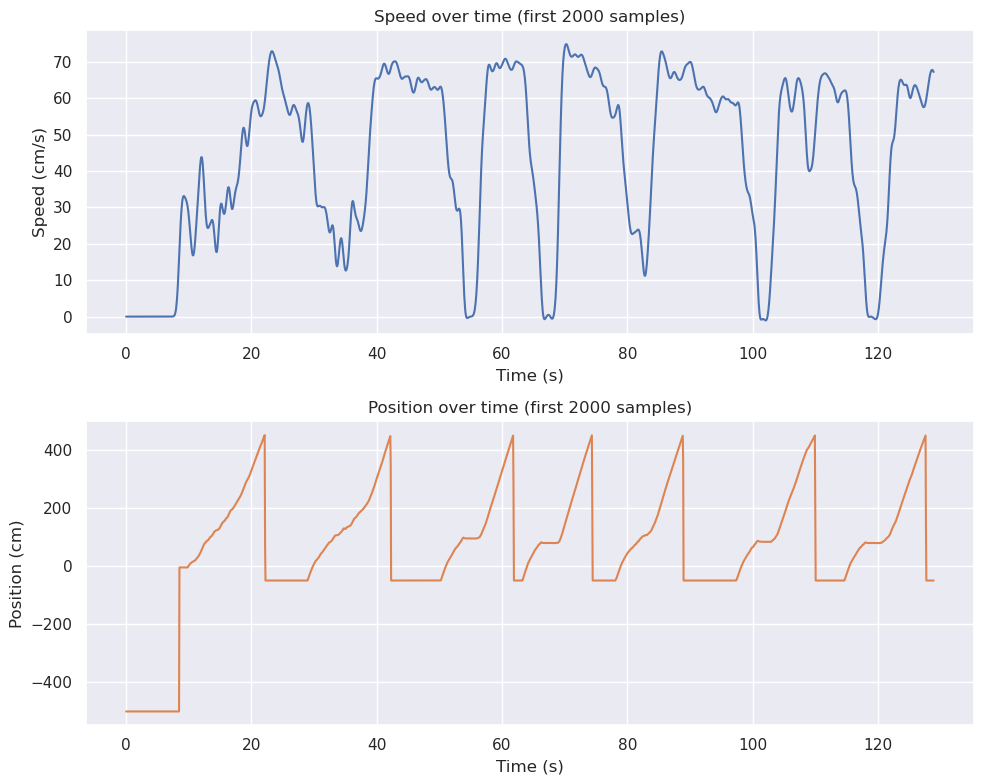

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

bt = nwb.processing['behavior'].data_interfaces['BehavioralTimeSeries']
speed = bt.time_series['speed']
position = bt.time_series['position']

n_samples = 2000
t_speed = speed.timestamps[:n_samples]
d_speed = speed.data[:n_samples]
t_pos = position.timestamps[:n_samples]
d_pos = position.data[:n_samples]

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
axes[0].plot(t_speed, d_speed, color='C0')
axes[0].set_title("Speed over time (first 2000 samples)")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel(f"Speed ({speed.unit})")

axes[1].plot(t_pos, d_pos, color='C1')
axes[1].set_title("Position over time (first 2000 samples)")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel(f"Position ({position.unit})")

plt.tight_layout()

## Summary and Future Directions

**Findings:**  
- Behavioral data show clear cyclic navigation patterns with varying speed and position across trials.  
- NWB file structure provides straightforward access to behavioral and optical physiology data.

**Future Directions:**  
- Visualize optical physiology (e.g., deconvolved fluorescence signals) for individual ROIs.  
- Correlate neural activity with behavioral metrics such as speed and position.  
- Investigate reward-related time series to study learning dynamics.